# Carregando os Dados do Yelp
Nesta célula, estamos importando a biblioteca 'pandas' e carregando os dados do arquivo `yelp_academic_dataset_business.parquet` para a variável `df_negocios`, que contém informações sobre os negócios do Yelp. Este arquivo é um conjunto de dados limpo, já com as informações essenciais.

In [6]:

import pandas as pd


file_path = 'yelp_academic_dataset_business.parquet'
df_negocios = pd.read_parquet(file_path)


# Visualizando Descrição Estatística dos Dados
 A utilização do método describe() permite uma análise rápida das principais métricas estatísticas para as colunas numéricas do conjunto de dados. Isso nos fornece uma visão geral das distribuições, incluindo tendências centrais como médias, variações (desvios padrão) e os extremos dos dados. Esses insights são cruciais para entender a variabilidade e identificar possíveis anomalias ou padrões que merecem atenção mais profunda, como valores extremos ou dados faltantes.

In [7]:
df_negocios.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


# Informações sobre o DataFrame
A função df_negocios.info() fornece uma visão geral sobre a estrutura do DataFrame, destacando os tipos de dados de cada coluna e a quantidade de valores não nulos. Esse passo é essencial para avaliar a qualidade dos dados, identificar colunas com valores ausentes e garantir que o tipo de dado esteja adequado para as análises subsequentes. Com essas informações, podemos tomar decisões informadas sobre como tratar dados faltantes e realizar conversões de tipo de dados, se necessário.


In [8]:
print(df_negocios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
None


# Contagem de Valores Nulos
A verificação de valores nulos com isnull().sum() oferece uma visão clara da integridade dos dados no DataFrame. Isso nos ajuda a identificar colunas que podem precisar de limpeza ou imputação de valores ausentes, o que é crucial para garantir a precisão e a consistência das análises. Dados faltantes podem impactar negativamente os resultados de modelos analíticos, tornando esse passo essencial antes de prosseguir com as etapas de modelagem e visualização.


In [9]:
print(df_negocios.isnull().sum())

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


# Removendo Duplicatas
Remover duplicatas com base na coluna business_id assegura que cada negócio esteja representado apenas uma vez no conjunto de dados, eliminando redundâncias. Isso é fundamental para evitar distorções nas análises e garantir que métricas como média, contagem e distribuições sejam calculadas de forma precisa, sem a influência de registros repetidos.


In [10]:
df_negocios = df_negocios.drop_duplicates(subset=['business_id'], keep='first')

# Remoção de Colunas Desnecessárias
A remoção das colunas 'is_open' e 'postal_code' refina o conjunto de dados, eliminando informações que não agregam valor à análise dos negócios do Yelp. Essa prática otimiza a performance da análise, tornando o DataFrame mais enxuto e focado nas variáveis mais relevantes, ajudando a reduzir a complexidade e melhorar a clareza nas interpretações.


In [11]:
df_negocios = df_negocios.drop(columns=['is_open', 'postal_code'])

In [5]:
excluidos = (len(df_negocios) - len(df_negocios.dropna())) / len(df_negocios) * 100
print(f"Percentual de dados excluídos: {excluidos:.2f}%")

Percentual de dados excluídos: 21.77%


# Filtragem de Coordenadas Geográficas Válidas
A filtragem das coordenadas geográficas assegura que os dados estejam dentro de um contexto realista, eliminando registros com valores de latitude e longitude inválidos. Isso é crucial para garantir que as análises geoespaciais, como visualizações de mapa ou clustering de localização, sejam precisas e relevantes, evitando distorções nos resultados.


In [3]:

df_negocios = df_negocios[(df_negocios['latitude'].between(-90, 90)) & (df_negocios['longitude'].between(-180, 180))]

# Exibindo as Colunas do DataFrame
 Verificar as colunas do DataFrame ajuda a entender a estrutura do conjunto de dados e a identificar quais informações estão presentes para análise. Essa visualização é fundamental para garantir que os dados contenham as variáveis necessárias antes de realizar qualquer análise ou transformação adicional.


In [4]:
columns = list(df_negocios.columns)
print(columns)

['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']


# Remoção de Linhas com Valores Nulos na Coluna 'categories'
A remoção de linhas com valores nulos na coluna 'categories' é essencial para garantir a qualidade dos dados antes de realizar análises baseadas em categorias. Esse processo elimina registros incompletos que poderiam afetar a precisão das conclusões, especialmente quando a coluna 'categories' é fundamental para segmentar ou agrupar os negócios.

In [12]:
columns_check = ['categories']
df_negocios = df_negocios.dropna(subset=columns_check)
print(df_negocios.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150243 entries, 0 to 150345
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150243 non-null  object 
 1   name          150243 non-null  object 
 2   address       150243 non-null  object 
 3   city          150243 non-null  object 
 4   state         150243 non-null  object 
 5   latitude      150243 non-null  float64
 6   longitude     150243 non-null  float64
 7   stars         150243 non-null  float64
 8   review_count  150243 non-null  int64  
 9   attributes    136601 non-null  object 
 10  categories    150243 non-null  object 
 11  hours         127123 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.9+ MB
None


# Extração dos Horários de Funcionamento
A extração dos horários de funcionamento de cada dia da semana permite uma análise mais detalhada sobre a disponibilidade dos negócios, segmentando os dados por dia. Isso facilita a visualização de padrões e tendências, como horários de pico ou dias de maior movimento, fornecendo informações valiosas para a otimização das operações dos negócios no Yelp.


In [13]:
def extract_hours(hours):
    if pd.isnull(hours):
        return pd.Series([None] * 7, index=['hours_Monday', 'hours_Tuesday', 'hours_Wednesday', 'hours_Thursday', 'hours_Friday', 'hours_Saturday', 'hours_Sunday'])
    else:
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        return pd.Series([hours.get(day, None) if isinstance(hours, dict) else None for day in days], index=['hours_Monday', 'hours_Tuesday', 'hours_Wednesday', 'hours_Thursday', 'hours_Friday', 'hours_Saturday', 'hours_Sunday'])

# Aplicar a função de extração de horários
df_hours = df_negocios['hours'].apply(extract_hours)
df_negocios = pd.concat([df_negocios, df_hours], axis=1)
df_negocios.drop('hours', axis=1, inplace=True)

pd.set_option('display.max_columns', None)
print(df_negocios.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state   latitude  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA  34.426679   
1  87 Grasso Plaza Shopping Center         Affton    MO  38.551126   
2             5255 E Broadway Blvd         Tucson    AZ  32.223236   
3                      935 Race St   Philadelphia    PA  39.955505   
4                    101 Walnut St     Green Lane    PA  40.338183   

    longitude  stars  review_count  \
0 -119.711197    5.0             7   
1  -90.335695    3.0            15   
2 -110.880452    3.5            22   
3  -75.155564    4.0            80   
4  -75.471659    4.5            13   

                   

# Extração dos Atributos em Colunas Separadas
A função `extract_attributes` foi aplicada para separar os atributos da coluna `'attributes'`, o que permite uma análise mais granular de diferentes características dos negócios. Com isso, transformamos informações compostas em colunas independentes, facilitando a exploração e a visualização de dados. Esse processo de "descompactação" é crucial para garantir que atributos como 'WiFi' ou 'Ambience' possam ser tratados separadamente e analisados de forma mais precisa.


In [14]:
# Extrair os atributos em colunas separadas
def extract_attributes(attributes):
    if pd.isnull(attributes):
        return pd.Series()
    else:
        return pd.Series(attributes)

df_attributes = df_negocios['attributes'].apply(extract_attributes)
df_negocios = pd.concat([df_negocios, df_attributes], axis=1)
df_negocios.drop('attributes', axis=1, inplace=True)

pd.set_option('display.max_columns', None)
print(df_negocios.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state   latitude  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA  34.426679   
1  87 Grasso Plaza Shopping Center         Affton    MO  38.551126   
2             5255 E Broadway Blvd         Tucson    AZ  32.223236   
3                      935 Race St   Philadelphia    PA  39.955505   
4                    101 Walnut St     Green Lane    PA  40.338183   

    longitude  stars  review_count  \
0 -119.711197    5.0             7   
1  -90.335695    3.0            15   
2 -110.880452    3.5            22   
3  -75.155564    4.0            80   
4  -75.471659    4.5            13   

                   

In [15]:
columns_check = [
    'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking', 
    'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'RestaurantsDelivery', 
    'WiFi', 'WheelchairAccessible', 'HappyHour', 'RestaurantsReservations', 
    'DogsAllowed', 'Alcohol', 'GoodForKids', 'Ambience', 
    'RestaurantsTableService', 'RestaurantsGoodForGroups', 'DriveThru', 
    'NoiseLevel', 'GoodForMeal', 'Smoking', 'Music', 'GoodForDancing', 
    'BestNights', 'HairSpecializesIn', 'Open24Hours', 
    'RestaurantsCounterService', 'AgesAllowed', 'DietaryRestrictions'
]

# Contar valores não nulos nas colunas especificadas
non_null_counts = df_negocios[columns_check].count()

print(non_null_counts)

ByAppointmentOnly              42339
BusinessAcceptsCreditCards    119765
BikeParking                    72638
RestaurantsPriceRange2         85314
RestaurantsTakeOut             59856
RestaurantsDelivery            56281
WiFi                           56914
WheelchairAccessible           28953
HappyHour                      15171
RestaurantsReservations        45247
DogsAllowed                    18284
Alcohol                        43189
GoodForKids                    53375
Ambience                       44279
RestaurantsTableService        19982
RestaurantsGoodForGroups       44170
DriveThru                       7760
NoiseLevel                     37993
GoodForMeal                    29087
Smoking                         4567
Music                           7521
GoodForDancing                  4628
BestNights                      5694
HairSpecializesIn               1065
Open24Hours                       39
RestaurantsCounterService         19
AgesAllowed                      129
D

# Remoção de Colunas Desnecessárias
Ao remover colunas desnecessárias, estamos focando em simplificar a análise e evitar sobrecarga de dados. Esse passo é crucial para aumentar a eficiência do processamento e garantir que apenas informações relevantes sejam consideradas nas etapas seguintes. Além disso, a remoção de colunas irrelevantes pode melhorar a performance de modelos preditivos e visualizações.


In [16]:

colunas_para_remover = [ 'BYOB', 'BYOBCorkage', 'Corkage', 'BusinessParking', 'BusinessAcceptsBitcoin', 'Caters', 'OutdoorSeating',
                         'RestaurantsAttire', 'CoatCheck','AcceptsInsurance', 'HasTV','DriveThru','Smoking',
                         'AgesAllowed','DietaryRestrictions','Music','GoodForDancing', 'BestNights','HairSpecializesIn',
                         'Open24Hours','RestaurantsCounterService' ]

df_negocios = df_negocios.drop(columns=colunas_para_remover)

pd.set_option('display.max_columns', None)
print(df_negocios.head())


              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state   latitude  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA  34.426679   
1  87 Grasso Plaza Shopping Center         Affton    MO  38.551126   
2             5255 E Broadway Blvd         Tucson    AZ  32.223236   
3                      935 Race St   Philadelphia    PA  39.955505   
4                    101 Walnut St     Green Lane    PA  40.338183   

    longitude  stars  review_count  \
0 -119.711197    5.0             7   
1  -90.335695    3.0            15   
2 -110.880452    3.5            22   
3  -75.155564    4.0            80   
4  -75.471659    4.5            13   

                   

# Limpeza e Normalização de Texto
A normalização das colunas categóricas, como `'WiFi'`, `'Alcohol'` e `'NoiseLevel'`, é um passo essencial para garantir consistência nos dados. Com isso, evitamos variações de formatação que poderiam levar a inconsistências nas análises. Isso é fundamental, especialmente quando se trabalha com dados textuais, pois melhora a qualidade dos dados ao permitir comparações mais precisas e consistentes.


In [17]:

df_negocios['WiFi'] = df_negocios['WiFi'].str.replace("u'", "").str.replace("'", "")
df_negocios['Alcohol'] = df_negocios['Alcohol'].str.replace("u'", "").str.replace("'", "")
df_negocios['NoiseLevel'] = df_negocios['NoiseLevel'].str.replace("u'", "").str.replace("'", "")

df_negocios['WiFi'] = df_negocios['WiFi'].str.capitalize()
df_negocios['Alcohol'] = df_negocios['Alcohol'].str.capitalize()
df_negocios['NoiseLevel'] = df_negocios['NoiseLevel'].str.capitalize()

print(df_negocios[['WiFi', 'Alcohol', 'NoiseLevel']].head())

   WiFi Alcohol NoiseLevel
0  None    None       None
1  None    None       None
2    No    None       None
3  Free    None       None
4  None    None       None


In [18]:
# normalizar textos
df_negocios['categories'] = df_negocios['categories'].str.lower().str.strip()
df_negocios['city'] = df_negocios['city'].str.lower().str.strip()

# Preenchimento e Ajuste da Coluna 'RestaurantsPriceRange2'
Nesta célula, estamos realizando o preenchimento de valores ausentes na coluna 'RestaurantsPriceRange2', que representa a faixa de preço dos restaurantes. A estratégia adotada consiste em primeiro usar a moda da faixa de preço para cada classe de estrelas ('stars'), garantindo que valores faltantes dentro de uma mesma categoria de avaliação sejam preenchidos com o valor mais comum dessa faixa de preço. Caso ainda existam valores nulos após esse preenchimento, utilizamos a mediana da coluna como uma segunda estratégia de imputação, o que ajuda a evitar distorções caso existam valores atípicos. Após o preenchimento, a coluna é convertida para valores numéricos e ajustada para garantir que os valores da faixa de preço estejam dentro do intervalo esperado de 1 a 4.


In [19]:
def calculate_mode(series):
    mode = series.mode()
    return mode.iloc[0] if not mode.empty else None

mode_price_range = df_negocios.groupby('stars')['RestaurantsPriceRange2'].agg(calculate_mode)

def fill_price_range(row, mode_price_range):
    if pd.isnull(row['RestaurantsPriceRange2']):
        return mode_price_range[row['stars']]
    else:
        return row['RestaurantsPriceRange2']

df_negocios['RestaurantsPriceRange2'] = df_negocios.apply(fill_price_range, axis=1, mode_price_range=mode_price_range)

df_negocios['RestaurantsPriceRange2'] = df_negocios['RestaurantsPriceRange2'].fillna(df_negocios['RestaurantsPriceRange2'].median())

df_negocios['RestaurantsPriceRange2'] = pd.to_numeric(df_negocios['RestaurantsPriceRange2'], errors='coerce')
df_negocios['RestaurantsPriceRange2'] = df_negocios['RestaurantsPriceRange2'].clip(1, 4).astype('Int64')

TypeError: Cannot convert ['2' '2' '2' ... '1' '4' '1'] to numeric

In [32]:
hours_columns = ['hours_Monday', 'hours_Tuesday', 'hours_Wednesday', 'hours_Thursday', 'hours_Friday', 'hours_Saturday', 'hours_Sunday']

df_negocios[hours_columns] = df_negocios[hours_columns].fillna("Closed")

# Preenchimento de Valores Nulos nas Colunas Categóricas e Booleanas
 Nesta célula, estamos tratando os valores nulos nas colunas do DataFrame df_negocios de forma estratégica, com base no tipo de dado de cada coluna. Para as colunas categóricas (como 'categories', 'Alcohol', 'Ambience', 'NoiseLevel', e 'WiFi'), estamos substituindo os valores ausentes por uma categoria padrão: 'Other' ou 'Unknown'. Isso evita que dados faltantes prejudiquem análises posteriores e assegura que todas as categorias estejam completas. Para as colunas booleanas (como 'BikeParking', 'ByAppointmentOnly', 'DogsAllowed', entre outras), os valores nulos são preenchidos com False, assumindo que, na ausência de informação, a resposta mais comum seria que a funcionalidade ou característica não está disponível. Esse preenchimento é essencial para garantir que o modelo de dados esteja completo e consistente para análises subsequentes.

In [20]:
df_negocios['categories'] = df_negocios['categories'].fillna('Other') 

def fill_na_with_default(df, columns, default_value):
    for column in columns:
        df[column] = df[column].fillna(default_value)
    return df

categorical_columns = [
    'Alcohol', 'Ambience', 'NoiseLevel', 'WiFi'
]
df_negocios = fill_na_with_default(df_negocios, categorical_columns, "Unknown")

boolean_columns = [
    'BikeParking', 'BusinessAcceptsCreditCards', 'ByAppointmentOnly', 
    'DogsAllowed', 'GoodForKids', 'GoodForMeal', 'HappyHour', 
    'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsReservations', 
    'RestaurantsTableService', 'RestaurantsTakeOut', 'WheelchairAccessible'
]
df_negocios = fill_na_with_default(df_negocios, boolean_columns, False)


In [21]:
# Verifica se tem mais algum dado faltante
null_counts = df_negocios.isnull().sum()
print(null_counts)
df_negocios.head()

business_id                       0
name                              0
address                           0
city                              0
state                             0
latitude                          0
longitude                         0
stars                             0
review_count                      0
categories                        0
hours_Monday                  35769
hours_Tuesday                 29612
hours_Wednesday               26472
hours_Thursday                25045
hours_Friday                  25244
hours_Saturday                39473
hours_Sunday                  69071
Alcohol                           0
Ambience                          0
BikeParking                       0
BusinessAcceptsCreditCards        0
ByAppointmentOnly                 0
DogsAllowed                       0
GoodForKids                       0
GoodForMeal                       0
HappyHour                         0
NoiseLevel                        0
RestaurantsDelivery         

,business_id,name,address,city,state,latitude,longitude,stars,review_count,categories,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday,Alcohol,Ambience,BikeParking,BusinessAcceptsCreditCards,ByAppointmentOnly,DogsAllowed,GoodForKids,GoodForMeal,HappyHour,NoiseLevel,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,WheelchairAccessible,WiFi
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",santa barbara,CA,34.426679,-119.711197,5.0,7,"doctors, traditional chinese medicine, naturop...",None,None,None,None,None,None,None,Unknown,Unknown,False,False,True,False,False,False,False,Unknown,False,False,2,False,False,False,False,Unknown
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,affton,MO,38.551126,-90.335695,3.0,15,"shipping centers, local services, notaries, ma...",0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,None,Unknown,Unknown,False,True,False,False,False,False,False,Unknown,False,False,2,False,False,False,False,Unknown
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,tucson,AZ,32.223236,-110.880452,3.5,22,"department stores, shopping, fashion, home & g...",8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,8:0-22:0,Unknown,Unknown,True,True,False,False,False,False,False,Unknown,False,False,2,False,False,False,True,No
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,philadelphia,PA,39.955505,-75.155564,4.0,80,"restaurants, food, bubble tea, coffee & tea, b...",7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0,None,Unknown,True,False,False,False,False,False,False,Unknown,False,False,1,False,False,True,False,Free
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,green lane,PA,40.338183,-75.471659,4.5,13,"brewpubs, breweries, food",None,None,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0,Unknown,Unknown,True,True,False,False,True,False,False,Unknown,False,False,2,False,False,True,True,Unknown


# Visualização Geográfica com Folium
 A criação de um mapa interativo com Folium permite analisar a distribuição geográfica dos negócios do Yelp, destacando áreas com maior concentração de estabelecimentos. O uso do MarkerCluster melhora a visualização ao agrupar pontos próximos, tornando a análise mais eficiente, especialmente em áreas densamente povoadas. Essa visualização pode revelar padrões espaciais interessantes, como clusters de negócios em regiões específicas, e é útil para identificar zonas de alta demanda ou oportunidades para expansão. O mapa gerado oferece uma ferramenta interativa para explorar as localizações de maneira dinâmica.

In [22]:
import folium
from folium.plugins import MarkerCluster


# Criar um mapa básico com pontos de latitude/longitude
mapa = folium.Map(location=[df_negocios['latitude'].mean(), df_negocios['longitude'].mean()], zoom_start=10)

marker_cluster = MarkerCluster().add_to(mapa)

for _, row in df_negocios.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['name']).add_to(marker_cluster)

mapa.save('mapa.html')

KeyboardInterrupt: 

# Contagem de Negócios por Estado
A contagem dos negócios por estado revela a distribuição geográfica dos dados, ajudando a identificar regiões com maior ou menor presença no Yelp. Isso é útil para estratégias de marketing e análise de mercado, além de detectar possíveis desequilíbrios nos dados.

In [23]:
estado_contagem = df_negocios['state'].value_counts()
print(estado_contagem)

state
PA     34013
FL     26309
TN     12051
IN     11243
MO     10907
LA      9916
AZ      9906
NJ      8527
NV      7706
AB      5572
CA      5202
ID      4464
DE      2262
IL      2144
TX         4
CO         3
HI         2
MA         2
WA         2
UT         1
NC         1
MI         1
MT         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64


# Conversão de Colunas Booleanas e Salvamento dos Dados Limpos
Aqui, as colunas booleanas são convertidas para o tipo booleano correto (True/False) usando o método map(), o que facilita a análise. Após essa conversão, os dados são salvos no formato Parquet, garantindo um armazenamento eficiente e mantendo a integridade dos dados para futuras análises.

In [24]:

boolean_columns = [
	'BikeParking', 'BusinessAcceptsCreditCards', 'ByAppointmentOnly', 
	'DogsAllowed', 'GoodForKids', 'GoodForMeal', 'HappyHour', 
	'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsReservations', 
	'RestaurantsTableService', 'RestaurantsTakeOut', 'WheelchairAccessible'
]

for column in boolean_columns:
	df_negocios[column] = df_negocios[column].map({'True': True, 'False': False})

df_negocios.to_parquet('./yelp_academic_dataset_business_cleaned.parquet')

# Carregando o Conjunto de Dados de Dicas do Yelp
A célula carrega o conjunto de dados de dicas do Yelp em um DataFrame df_tip, permitindo explorar as interações dos usuários com os negócios. O formato Parquet facilita a leitura e armazenamento eficiente. A função head() exibe as primeiras linhas para uma visão inicial dos dados.

In [25]:
import pandas as pd

file_path = 'yelp_academic_dataset_tip.parquet'
df_tip = pd.read_parquet(file_path)

df_tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


# Exibindo as Colunas do Conjunto de Dados de Dicas
Nesta célula, obtemos e exibimos os nomes das colunas do DataFrame df_tip para entender rapidamente a estrutura dos dados. Isso ajuda a identificar as variáveis disponíveis para análise, como user_id, business_id, date, e text, essenciais para explorar padrões de comportamento e opiniões dos usuários.

In [26]:
columns_tip = list(df_tip.columns)
print(columns_tip)

['user_id', 'business_id', 'text', 'date', 'compliment_count']


In [27]:
df_tip = df_tip.drop_duplicates()

In [28]:
df_tip = df_tip.dropna()

In [29]:
df_tip['text'] = df_tip['text'].str.lower().str.strip()

In [30]:
null_counts_tip = df_tip.isnull().sum()
print(null_counts_tip)

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64


In [31]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908848 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908848 non-null  object        
 1   business_id       908848 non-null  object        
 2   text              908848 non-null  object        
 3   date              908848 non-null  datetime64[ns]
 4   compliment_count  908848 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 41.6+ MB


In [32]:
df_tip.describe()

,date,compliment_count
count,908848,908848.000000
mean,2015-06-14 10:29:31.463819520,0.012526
min,2009-04-16 13:11:49,0.000000
25%,2013-01-26 01:28:06.750000128,0.000000
50%,2015-03-15 01:22:40,0.000000
75%,2017-08-02 05:30:16,0.000000
max,2022-01-19 20:38:55,6.000000
std,NaN,0.120768


# Filtrando Negócios com Mais de 100 Reviews
Esta célula filtra os negócios com mais de 100 reviews, permitindo focar em empresas com maior volume de interações dos usuários, o que pode indicar maior popularidade ou relevância. Isso é útil para analisar padrões em negócios mais destacados.

In [33]:
#Filtra os negócios que possuem mais de 100 reviews
contagem_reviews = df_tip['business_id'].value_counts()
ids_mais_reviews = contagem_reviews[contagem_reviews > 100].index

df_tip_mais_reviews = df_tip[df_tip['business_id'].isin(ids_mais_reviews)]
df_tip_mais_reviews.head()

,user_id,business_id,text,date,compliment_count
8,VL12EhEdT4OWqGq0nIqkzw,xODBZmX4EmlVvbqtKN7YKg,tacos,2012-07-27 01:48:24,0
17,kjFgyrCvmVVGSlgWzRXILw,ReX09lhufLTAx19krkltDA,got the grilled chicken entree. it was delicio...,2013-06-10 20:18:41,0
22,phKNHTaokisQkZ7qQbxryA,pWuoHHu0LuVrD0HjadDygg,crepes please!!!,2010-11-21 20:52:49,0
28,CozGguiwx7JEVk7cAwdvpA,ghsaIqQ1xY3cWtWWJ4QW5w,icky on tap,2010-12-27 20:38:49,0
30,jDThlALkraoQLLBYHqY7FQ,9DJhhBqQSu-gTBwaqdhgpQ,come early for the best service as they fill u...,2016-01-16 19:13:57,0


In [36]:
print(df_tip.head())

                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                date  \
0                     avengers time with the ladies. 2012-05-18 02:17:21   
1  they have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2             it's open even when you think it isn't 2013-08-18 00:56:08   
3                          very decent fried chicken 2017-06-27 23:05:38   
4             appetizers.. platter special for lunch 2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [35]:
df_tip_mais_reviews.to_parquet('./yelp_academic_dataset_tip_cleaned.parquet')

In [50]:
# Análise das 10 cidades com mais estabelecimentos bem avaliados
cidade_bem_avaliada = estabelecimentos_bem_avaliados.groupby('city').agg(
    media_avaliacao=('stars', 'mean'),
    total_estabelecimentos=('business_id', 'count')
).sort_values(by='total_estabelecimentos', ascending=False)

# Exibir as top 10 cidades com mais estabelecimentos bem avaliados
print("\nTop 10 cidades com mais estabelecimentos bem avaliados:")
print(cidade_bem_avaliada.head(10).to_string())


Top 10 cidades com mais estabelecimentos bem avaliados:
               media_avaliacao  total_estabelecimentos
city                                                  
philadelphia          4.675896                    4298
tucson                4.698089                    2721
tampa                 4.684624                    2673
reno                  4.716222                    2250
new orleans           4.668840                    2224
indianapolis          4.669005                    2210
nashville             4.689114                    2168
santa barbara         4.757353                    1904
saint louis           4.657471                    1305
boise                 4.714778                    1015


In [49]:
#Filtrando estabelecimentos bem avaliados (média de estrelas > 4)
estabelecimentos_bem_avaliados = df_negocios[df_negocios['stars'] > 4]
# Listagem dos estabelecimentos bem avaliados
print("\nEstabelecimentos bem avaliados nas 10 cidades mais populares:")
top_10_cidades = cidade_bem_avaliada.head(10).index

# Filtrando os negócios nas 10 cidades mais populares
estabelecimentos_populares = estabelecimentos_bem_avaliados[estabelecimentos_bem_avaliados['city'].isin(top_10_cidades)]

# Exibindo detalhes dos estabelecimentos
print(estabelecimentos_populares[['name', 'city', 'categories']].head(10).to_string(index=False))


Estabelecimentos bem avaliados nas 10 cidades mais populares:
                            name          city                                                                                                  categories
        Abby Rappoport, LAC, CMQ santa barbara  doctors, traditional chinese medicine, naturopathic/holistic, acupuncture, health & medical, nutritionists
        Arizona Truck Outfitters        tucson                                                       automotive, auto parts & supplies, auto customization
                             BAP  philadelphia                                                                                         korean, restaurants
Altitude Trampoline Park - Boise         boise                                                                               trampoline parks, active life
Big Boyz Toyz Motorcycle Rentals        tucson                           towing, hotels & travel, automotive, motorcycle rental, motorcycle gear, shopping
       

# Mesclando os dois datasets: 'business' e 'tip'
O objetivo é que o 'df_tip_business' armazene o número de comentários e avaliações (estrelas) de cada negócio.

In [77]:
#Juntando os dois datasets
df_negocios = pd.read_parquet('yelp_academic_dataset_business.parquet')

df_tip_business = df_tip.groupby('business_id').agg(total_comments=('text', 'count')).reset_index()

df_tip_business = df_tip_business.merge(df_negocios[['business_id', 'stars']], on='business_id', how='left')

df_tip_business.head()

,business_id,total_comments,stars
0,---kPU91CF4Lq2-WlRu9Lw,4,4.5
1,--0iUa4sNDFiZFrAdIWhZQ,6,3.0
2,--30_8IhuyMHbSOcNWd6DQ,1,3.5
3,--7PUidqRWpRSpXebiyxTg,3,2.0
4,--8IbOsAAxjKRoYsBFL-PA,4,3.0


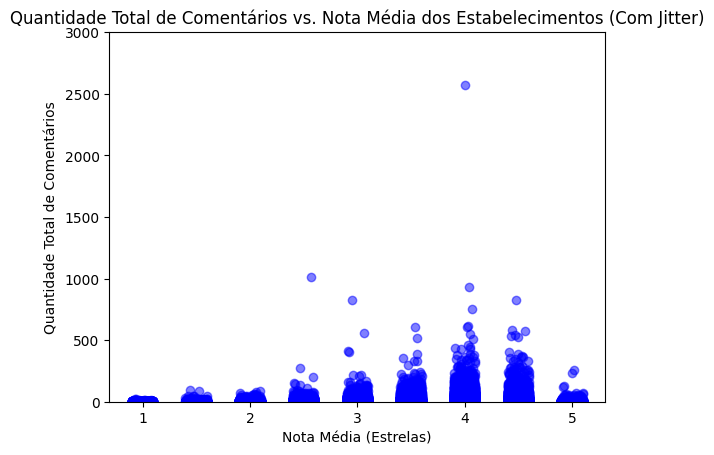

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Jitter para os pontos não ficarem sobrepostos
jitter_strength = 0.1
df_tip_business['stars_jittered'] = df_tip_business['stars'] + np.random.uniform(-jitter_strength, jitter_strength, size=df_tip_business.shape[0])
df_tip_business['total_comments_jittered'] = df_tip_business['total_comments'] + np.random.uniform(-jitter_strength, jitter_strength, size=df_tip_business.shape[0])

plt.scatter(df_tip_business['stars_jittered'], df_tip_business['total_comments_jittered'], alpha=0.5, color='blue')
plt.title('Quantidade Total de Comentários vs. Nota Média dos Estabelecimentos (Com Jitter)')
plt.xlabel('Nota Média (Estrelas)')
plt.ylabel('Quantidade Total de Comentários')

plt.ylim(0, 3000)

plt.grid(False)

plt.show()


# Encontrando relação entre elogios e popularidade do ambiente
As palavras positivas disponíveis na lista abaixo foram selecionadas através de uma nuvem com as palavras mais encontradas nos comentários do dataset.

In [79]:
import re

positive_words = ['good', 'excellent', 'amazing', 'best', 'fantastic', 'lovely', 'awesome','nice']

def count_positive_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return sum(1 for word in words if word in positive_words)

df_tip['positive_words_count'] = df_tip['text'].apply(count_positive_words)

df_tip.head()

,user_id,business_id,text,date,compliment_count,positive_words_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0,1
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0,0
